***注:Assignment5包含2个代码填空和1个问答题**

## 无监督学习 (Unsupervised Learning)

相关算法：
1. K-means聚类
2. PCA主成分分析

### Fashion-MNIST数据集(Fashion-MNIST Dataset)

来源：[A MNIST-like fashion product database](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST数据集由[Zalando](https://jobs.zalando.com/tech/)提出，与经典的[MNIST](http://yann.lecun.com/exdb/mnist/)数据集格式完全相同：包含10个种类，总计60000张训练图片和10000张测试图片，每张图片为28\*28尺寸的灰度图片。

In [1]:
import os
import random
import numpy as np

def read_datasets(train_dir):
        fd = open(os.path.join(train_dir, 'train-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        train_images = loaded[16:].reshape((60000, 28, 28, 1)).astype(np.float)
        fd = open(os.path.join(train_dir, 'train-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        train_labels = loaded[8:].reshape(60000).astype(np.int)
        fd = open(os.path.join(train_dir, 't10k-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        test_images = loaded[16:].reshape((10000, 28, 28, 1)).astype(np.float)
        fd = open(os.path.join(train_dir, 't10k-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        test_labels = loaded[8:].reshape(10000).astype(np.int)
        # shuffle image and label in same order
        state = np.random.get_state()
        np.random.shuffle(train_images)
        np.random.set_state(state)
        np.random.shuffle(train_labels)
        state = np.random.get_state()
        np.random.shuffle(test_images)
        np.random.set_state(state)
        np.random.shuffle(test_labels)
        return train_images, train_labels,test_images, test_labels


读取所有数据，检查数据格式，所有图片均已向量化处理。

In [2]:
X_train_all, y_train_all, X_test_all, y_test_all = read_datasets("./dataset/Assignment5/Fashion_MNIST8667")
X_train_all = X_train_all.reshape((X_train_all.shape[0], -1))
X_test_all = X_test_all.reshape((X_test_all.shape[0], -1))

print(X_train_all.shape, y_train_all.shape)
print(X_test_all.shape, y_test_all.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


预览每种类别的部分图片。

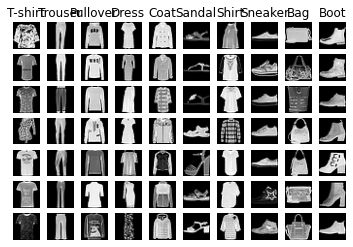

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train_all == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train_all[idx].reshape((28,28)),cmap=plt.cm.gray)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

我们选取其中的5个类别的图片进行K-means聚类学习。

In [4]:
n = 5
train_mask = (y_train_all <=4)
test_mask= (y_test_all <=4)
X_train = X_train_all[train_mask]
y_train = y_train_all[train_mask]
X_test = X_test_all[test_mask]
y_test = y_test_all[test_mask]
    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(30000, 784) (30000,)
(5000, 784) (5000,)


### K-means聚类算法(k-means Clustering)

实现最基本的K-means聚类算法。

算法流程：
1. 提供所需簇(cluster)的数量k。
2. 随机选取k个实例作为种子节点，即作为每个簇的质心(centroid)。
3. 迭代以下步骤：
	* 将每实例分配给最近质心相关联的簇。
	*	重新估计每个簇的质心。
4. 当聚类收敛时停止，或者在经过固定次数的迭代之后。

**TODO：你需要补全K_Means类中fit函数的代码实现**

代码解释：
1. K_Means类中n_clusters变量为算法流程步骤1中的k，centroids为算法流程步骤2中的质心。
2. fit函数参数列表中的max_iter为算法流程步骤4中的最大迭代次数，epsilon为收敛的阈值。

要求：
1. 实现算法流程中的所有步骤，包括质心的随机选取，迭代的收敛控制。
2. 对fit函数的返回值没有特别要求，只需要将质心迭代结果存于centroids中，用于predict函数调用。
3. 对质心的距离函数没有特别要求，可以尝试各种距离函数。

In [5]:
class K_Means:
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        self.centroids = None

    def fit(self, X, max_iter=300, epsilon=0.001):
        #############################################################################
        # TODO:                                                                     #
        # Implement the fit function                                                #
        #############################################################################
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        labels = np.zeros(X.shape[0])
        loss = 0
        for _ in range(max_iter):
            distance = np.array([np.linalg.norm(X - self.centroids[i], axis=1) for i in range(self.n_clusters)]).T
            new_labels = np.argmin(distance, axis=1)
            if np.array_equal(labels, new_labels):
                break
            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(X[new_labels == i], axis=0)
            labels = new_labels
            loss = np.sum([np.linalg.norm(X[labels == i] - self.centroids[i]) for i in range(self.n_clusters)])
            if loss < epsilon:
                break
        return loss
    

        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
        
            
    def predict(self, X):
        return np.array([np.argmin(np.diag(np.dot(self.centroids - X[i], (self.centroids - X[i]).T)))
                        for i in range(X.shape[0])])

在测试数据集上进行测试，并输出K-means聚类算法聚类分布。

In [6]:
k_means = K_Means(n_clusters=n)
k_means.fit(X_train, max_iter=300, epsilon=0.001)
y_predicted = k_means.predict(X_test)
result = np.zeros((n, n), dtype=int)
for i in range(X_test.shape[0]):
    result[y_test[i]][y_predicted[i]] += 1
print(result)
result = result * 1.0
for i in range(n):
    result[i] /= np.sum(result[i])
print(result)

[[308  70 593  29   0]
 [ 73  43  39  12 833]
 [347   5  24 624   0]
 [231 594 159  13   3]
 [154  42 129 673   2]]
[[0.308 0.07  0.593 0.029 0.   ]
 [0.073 0.043 0.039 0.012 0.833]
 [0.347 0.005 0.024 0.624 0.   ]
 [0.231 0.594 0.159 0.013 0.003]
 [0.154 0.042 0.129 0.673 0.002]]


通过可视化直观表现聚类的分布情况。

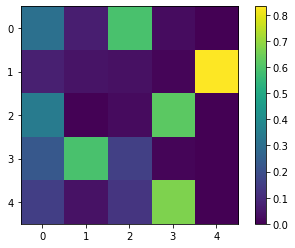

In [7]:
plt.imshow(result)
plt.colorbar()
plt.show()

由于K-means聚类算法属于无监督学习算法，我们无法知晓每个质心和真实分类的对应关系，没有直观的正确率概念。这里我们假设最终每个质心分别与真实分类之间是一一对应关系，并通过枚举其对应关系得到一个自定义的正确率。

**最终你实现的K-means聚类算法应该达到50%的正确率。**

最终的学习结果可能存在一定的波动性。

In [8]:
from itertools import permutations as perm

score = 0
for p in list(perm([i for i in range(n)])):
    s = 0
    for k in range(n):
        s += result[k][p[k]]
    score = max(score, s)
print(score / np.sum(result))

0.608


#### Question1： 对于如何改进K-means聚类算法，例如迭代速度、稳定性、避免局部最优等方面，你有什么想法？

#### Answer：
- 使用K-means++，优化初始点的选择，减少迭代次数
- 可以更换随机种子、多次运行取平均，从而减小不稳定性
- 使用三角不等式计算距离，减少计算次数

### PCA主成分分析(Principal Components Analysis)

基于特征值分解协方差矩阵方法实现PCA算法。

算法流程：
1. 确定原矩阵$\mathbf{X}_{n \times m}$以及主成分数量k。
2. 对$\mathbf{X}$的每一维去中心化，即减掉各自维度的平均值。
3. 计算协方差矩阵$\frac{1}{n}\mathbf{X}^T\mathbf{X}$的特征值和特征向量。
4. 选取k个最大的特征值对应的特征向量，组成降维投影矩阵。
5. 对原矩阵进行降维处理并输出，维度为$n \times k$。

**TODO：你需要补全pca函数的代码实现**

代码解释：
1. pca函数参数列表中的X和k为PCA主成分分析算法流程的步骤1中的原矩阵$\mathbf{X}_{n \times m}$以及主成分数量k。
2. 函数返回值中的pca_result是步骤5中维度为$n \times k$的输出


要求：
1. 可以使用numpy库中的特征值和特征向量计算函数，但不允许直接调用sklearn库中的PCA相关函数。
2. 可以不用统一每个维度的方差。

In [16]:
def pca(X, k):
  #############################################################################
  # TODO:                                                                     #
  # Implement the pca function                                                #
  #############################################################################
  mean = np.mean(X, axis=0)
  X = X - mean
  cov = np.cov(X.T)
  eigenvalues, eigenvectors = np.linalg.eig(cov)
  idx = np.argsort(-eigenvalues)
  eigenvectors = eigenvectors[:, idx]
  projection = np.dot(X, eigenvectors[:, :k])
  
    
  return projection

  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################
  

对PCA主成分分析算法的结果进行可视化处理。

(5005, 2)


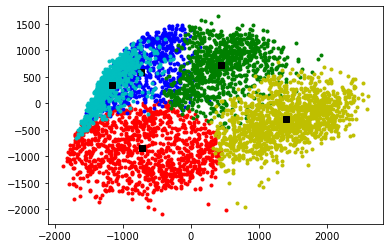

In [17]:
X_input = np.concatenate([X_test, k_means.centroids])
X_pca = pca(X_input, 2)
print(X_pca.shape)
color = ['r', 'b', 'g', 'y', 'c']
for i in range(n):
    x_list = []
    y_list = []
    for j in range(X_test.shape[0]):
        if y_predicted[j] == i:
            x_list.append(X_pca[j][0])
            y_list.append(X_pca[j][1])
    plt.plot(x_list, y_list, '.', color=color[i])
    plt.plot([X_pca[- n + i][0]], [X_pca[- n + i][1]], 's', color='k')
plt.show()

与sklearn库中的PCA实现对比。

**最终你实现的PCA主成分分析算法的结果应该与sklearn库的实现相似。**

可能会存在旋转、缩放、镜像等差异，但拓扑关系应该保持一致。

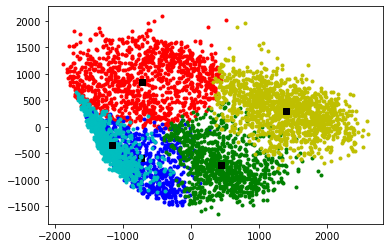

In [13]:
from sklearn.decomposition import PCA

X_input = np.concatenate([X_test, k_means.centroids])
X_pca = PCA(2).fit_transform(X_input)
color = ['r', 'b', 'g', 'y', 'c']
for i in range(n):
    x_list = []
    y_list = []
    for j in range(X_test.shape[0]):
        if y_predicted[j] == i:
            x_list.append(X_pca[j][0])
            y_list.append(X_pca[j][1])
    plt.plot(x_list, y_list, '.', color=color[i])
    plt.plot([X_pca[- n + i][0]], [X_pca[- n + i][1]], 's', color='k')
plt.show()